## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.cluster import DBSCAN, OPTICS, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

In [2]:
train = sparse.load_npz('/kaggle/input/ml-2025-spring-unsupervised/train.npz')
X = train.toarray()

 ## Нормализация данных

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Метод МГК для уменьшения количества компонент

In [9]:
if X.shape[1] > 50:
    pca = PCA(n_components=0.7, random_state=20)
    X_reduced = pca.fit_transform(X_scaled)
    print(f"Уменьшено до {pca.n_components_} компонент")
else:
    X_reduced = X_scaled

Уменьшено до 1350 компонент


### Попытки использовать DBSCAN

In [ ]:
# def find_optimal_eps(X, k=4):
#     neigh = NearestNeighbors(n_neighbors=k)
#     neigh.fit(X)
#     distances, _ = neigh.kneighbors(X)
#     k_distances = np.sort(distances[:, -1])
    
#     gradients = np.gradient(k_distances)
#     optimal_idx = np.argmax(gradients)
#     optimal_eps = k_distances[optimal_idx]
    
#     plt.figure(figsize=(10, 5))
#     plt.plot(k_distances, label='K-distance')
#     plt.axvline(x=optimal_idx, color='r', linestyle='--', label=f'Оптимальное eps={optimal_eps:.3f}')
#     plt.xlabel('Точки')
#     plt.ylabel(f'k-NN Расстояние')
#     plt.legend()
#     plt.show()
#     return optimal_eps

# optimal_eps = find_optimal_eps(X_reduced)
# min_samples = max(2, int(0.005 * X.shape[0]))  

# dbscan = DBSCAN(
#     eps=0.1,
#     min_samples=3,
#     metric='euclidean',
#     n_jobs=-1
# )
# labels = dbscan.fit_predict(X_reduced)

# Проверка: если все точки в одном кластере, используем KMeans
# if len(np.unique(labels)) == 1:



## k-means

In [5]:
kmeans = KMeans(n_clusters=12) 
labels = kmeans.fit_predict(X_reduced)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Рисуночек

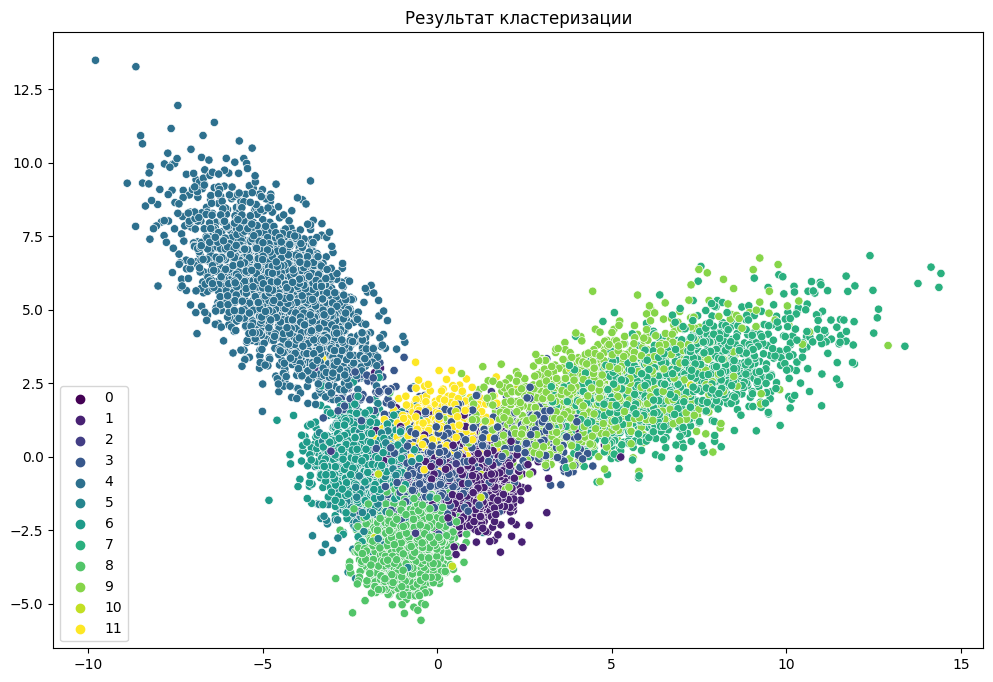

In [6]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_reduced[:, 0],
    y=X_reduced[:, 1],
    hue=labels,
    palette="viridis",
    legend='full'
)
plt.title('Результат кластеризации')
plt.show()

## Записываем в submission результаты

In [8]:
pd.DataFrame({
    'ID': range(len(labels)),
    'Target': labels
}).to_csv('submission.csv', index=False)